# I-94 Traffic Westbound Traffic

The goal of this project to explore the causes of traffic on I-94 and to create easy to understand data visualizations for readers.

The data is from a traffic station roughly midway between Minneapolis and St Paul, MN, and can not be used to generalize as traffic conditions for all of I-94.

The dataset is from https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

## Data Inspection and Cleanup

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [24]:
traffic.sample(10)

,holiday,temp_kelvin,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day/night
22208,None,272.77,0.00,0.0,40,Clouds,scattered clouds,2016-04-03 06:00:00,1210,night
14323,None,285.77,0.25,0.0,40,Rain,light rain,2014-05-14 11:00:00,4831,day
18887,None,283.70,0.00,0.0,90,Clouds,overcast clouds,2015-10-09 00:00:00,2365,night
47178,None,289.54,0.25,0.0,90,Rain,light rain,2018-08-28 21:00:00,2576,night
41016,None,270.93,0.00,0.0,1,Clear,sky is clear,2018-01-27 04:00:00,449,night
11801,None,249.15,0.00,0.0,1,Clear,sky is clear,2014-01-27 02:00:00,195,night
14138,None,288.76,6.60,0.0,90,Mist,mist,2014-05-08 16:00:00,5902,day
17238,None,298.30,0.00,0.0,90,Rain,light rain,2015-08-09 12:00:00,4602,day
17200,None,291.53,0.00,0.0,1,Fog,fog,2015-08-08 03:00:00,446,night
18062,None,294.45,0.00,0.0,1,Clear,sky is clear,2015-09-07 21:00:00,2309,night


In [4]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


Turns out the `temp` column is measured in Kelvin,which is why the max is as high as 310 degrees. Turns out I-94 is not hell on Earth. Let's rename it so that it's less confusing going forward.

In [5]:
traffic.rename({'temp': 'temp_kelvin'}, inplace = True, axis =1)

`date_time` looks like a string object instead of a datetime object. Let's look at the format of it and convert it.

In [6]:
traffic['date_time'].head()

0    2012-10-02 09:00:00
1    2012-10-02 10:00:00
2    2012-10-02 11:00:00
3    2012-10-02 12:00:00
4    2012-10-02 13:00:00
Name: date_time, dtype: object

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

## Daytime VS. Nighttime Traffic

I've noticed that `traffic_volume`has quite a large range. I suspect that there's likely a major difference in volume between day and night. I'm going to had a `day/night` column using the following criteria:

Day = 7 am to 7pm<br>
Night = 7:01pm to 6:59 am

In [8]:
traffic.loc[(traffic['date_time'].dt.hour >=7) 
                               | (traffic['date_time'].dt.hour <=19),'day/night'] = 'day'
traffic.loc[(traffic['date_time'].dt.hour <7) 
                               | (traffic['date_time'].dt.hour >19),'day/night'] = 'night'


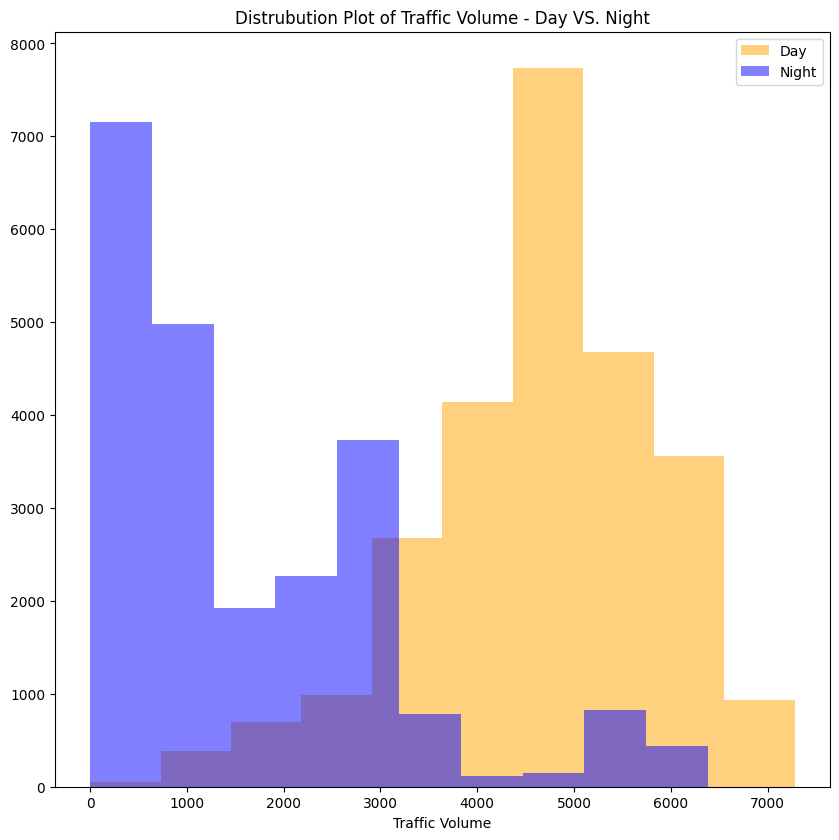

In [9]:
plt.figure(figsize=(10,10))
plt.hist(x=traffic[traffic['day/night'] == 'day']['traffic_volume'], 
         color='orange', alpha=.5, label='Day')
plt.hist(x=traffic[traffic['day/night'] == 'night']['traffic_volume'], 
         color='blue', alpha=.5, label='Night')
plt.xlabel('Traffic Volume')
plt.title('Distrubution Plot of Traffic Volume - Day VS. Night')
plt.legend()
plt.show()

As expected, day has a left skew, which means there is a much higher volume of traffic during the day time hours. This most likely due to commuting and people, you know, sleeping at night.

Since our goal is to find indicators of heavy traffic, we can drop night time data from our data set going forward.

In [10]:
day_traffic = traffic[traffic['day/night'] == 'day'].copy()

## Monthly Traffic

In [11]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()

I'm just going to start exploring the data now. First let's see if there's any difference month by month. I'm not really sure what I'm looking for here apart from just curiosity.

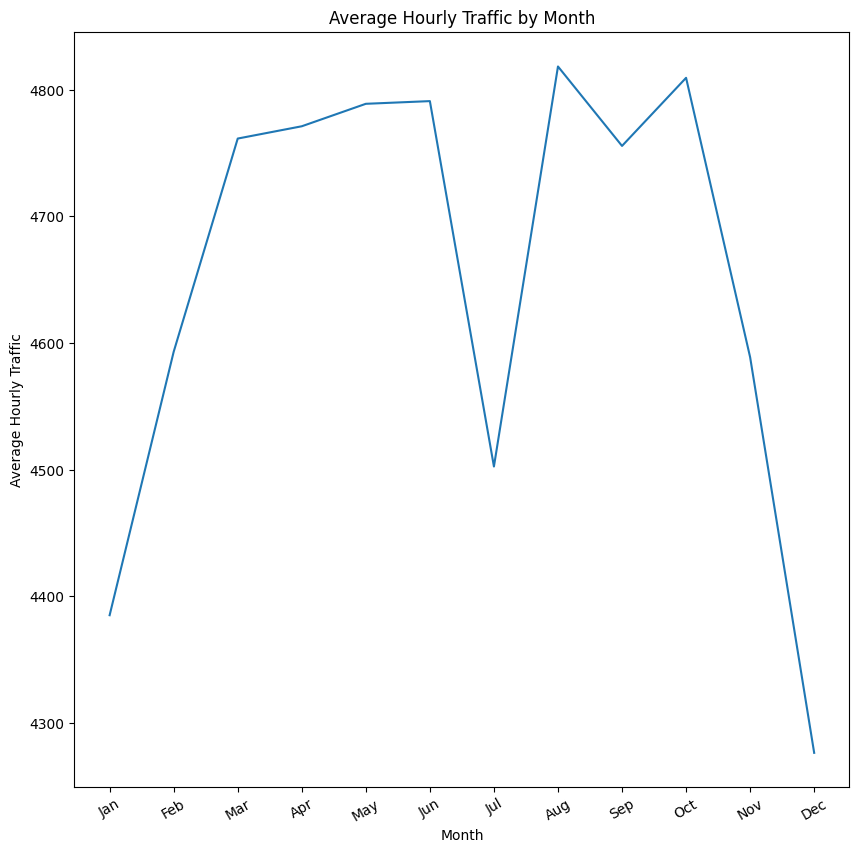

In [12]:
plt.figure(figsize=(10,10))
plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Average Hourly Traffic')
plt.title('Average Hourly Traffic by Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul',
            'Aug','Sep','Oct','Nov','Dec'],
          rotation=30)
plt.show()

Being a southerner, I didn't expect to see the drops in the winter months. I suspect this is the result of snow. The other odd month is July. I wonder what's going on then?

## Traffic by Day of the Week

Let's repeat the same thing for the day of the week. I would expect lower traffic on the weekends. Let's see!

In [13]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
by_dayofweek = day_traffic.groupby('dayofweek').mean()

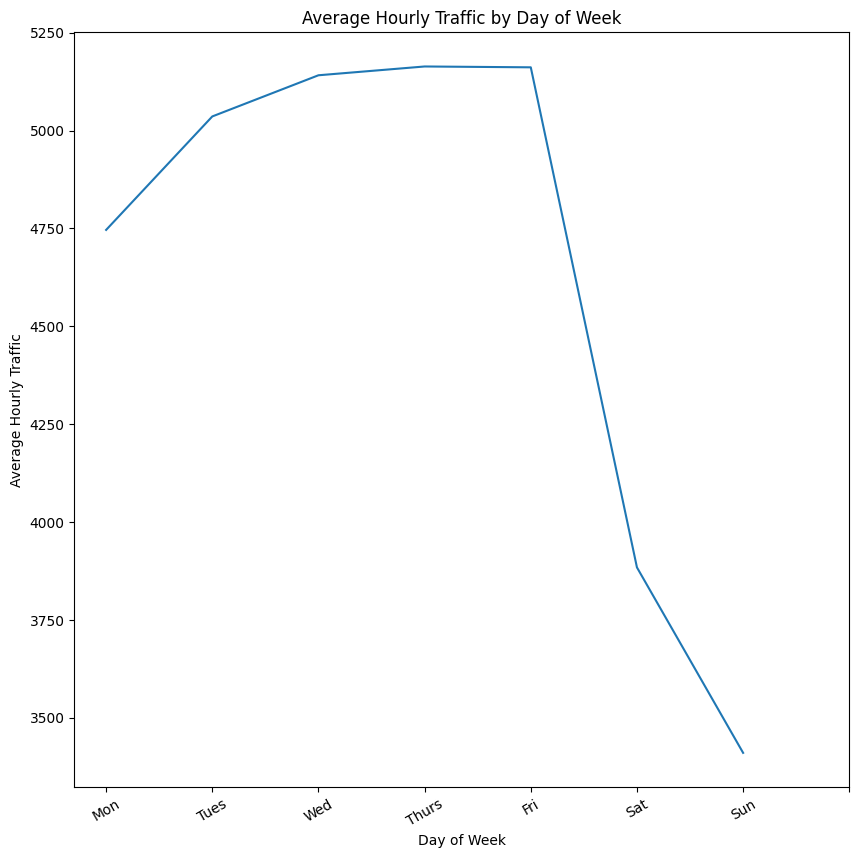

In [14]:
plt.figure(figsize=(10,10))
plt.plot(by_dayofweek['traffic_volume'])
plt.xlabel('Day of Week')
plt.ylabel('Average Hourly Traffic')
plt.title('Average Hourly Traffic by Day of Week')
plt.xticks([0,1,2,3,4,5,6,7], 
           ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'],
          rotation=30)
plt.show()

Exactly as expected! Let's follow the same logic as above and only look at the week days since we're looking for indicators of heavy traffic.

In [15]:
weekday_traffic = day_traffic[day_traffic['dayofweek'] <=4].copy()

## Hourly Traffic

Now, let's inspect hourly traffic. I'm expecting to see some rush hour spikes.

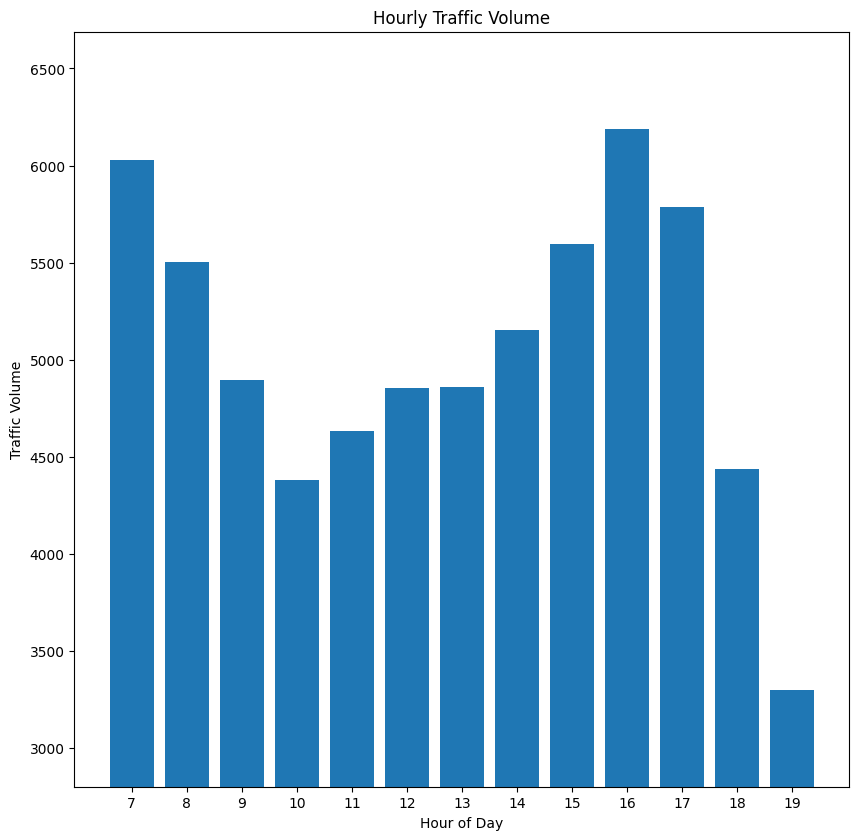

In [17]:
weekday_traffic['hour'] = weekday_traffic['date_time'].dt.hour
by_hour = weekday_traffic.groupby('hour').mean()
plt.figure(figsize=(10,10))
plt.bar(height=by_hour['traffic_volume'], x=[7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.title('Hourly Traffic Volume')
plt.xticks([7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.ylim(by_hour['traffic_volume'].min()-500, by_hour['traffic_volume'].max()+500)
plt.show()

It's pretty clear that there's major spikes around 7am and 4pm.

## Other Numerical Traffic Indicators

Next, let's look for correlations between some of the other columns and traffic volume.

In [18]:
weekday_traffic.corr()

,temp_kelvin,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
temp_kelvin,1.000000,0.012138,-0.021357,-0.159235,0.114327,0.237383,-0.002813,0.146752
rain_1h,0.012138,1.000000,-0.000133,0.005179,0.003297,0.001398,-0.010433,0.007851
snow_1h,-0.021357,-0.000133,1.000000,0.029817,-0.002361,0.028180,0.005164,0.001505
clouds_all,-0.159235,0.005179,0.029817,1.000000,-0.071516,0.002764,-0.040137,0.014936
traffic_volume,0.114327,0.003297,-0.002361,-0.071516,1.000000,-0.021472,0.137659,-0.221247
month,0.237383,0.001398,0.028180,0.002764,-0.021472,1.000000,0.015941,0.006149
dayofweek,-0.002813,-0.010433,0.005164,-0.040137,0.137659,0.015941,1.000000,0.002260
hour,0.146752,0.007851,0.001505,0.014936,-0.221247,0.006149,0.002260,1.000000


Temperature seems to have the strongest correlation with traffic volume. Let's take a closer look.

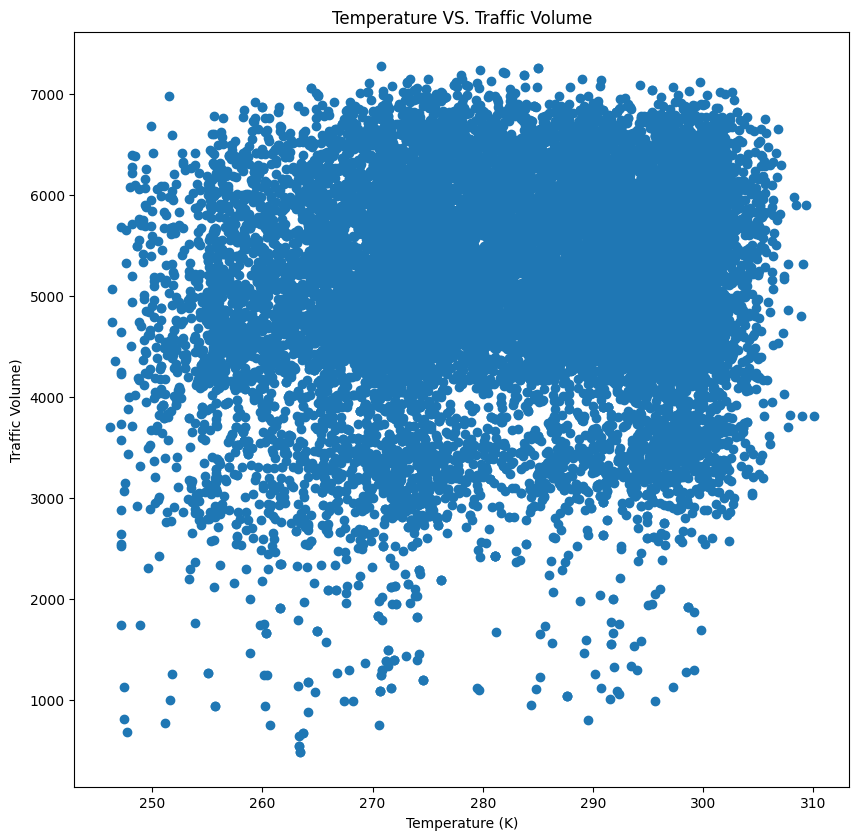

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x=weekday_traffic['temp_kelvin'], y=weekday_traffic['traffic_volume'])
plt.xlabel('Temperature (K)')
plt.ylabel('Traffic Volume)')
plt.title('Temperature VS. Traffic Volume')
plt.show()

I can't visually see any strong correlation here. 

## Categorical Traffic Indicators

The 2 weather columns are in categorical rather than numerical. Let's see if we can find anything there.

In [20]:
by_weather_main = weekday_traffic.groupby('weather_main').mean()
by_weather_description = weekday_traffic.groupby('weather_description').mean()

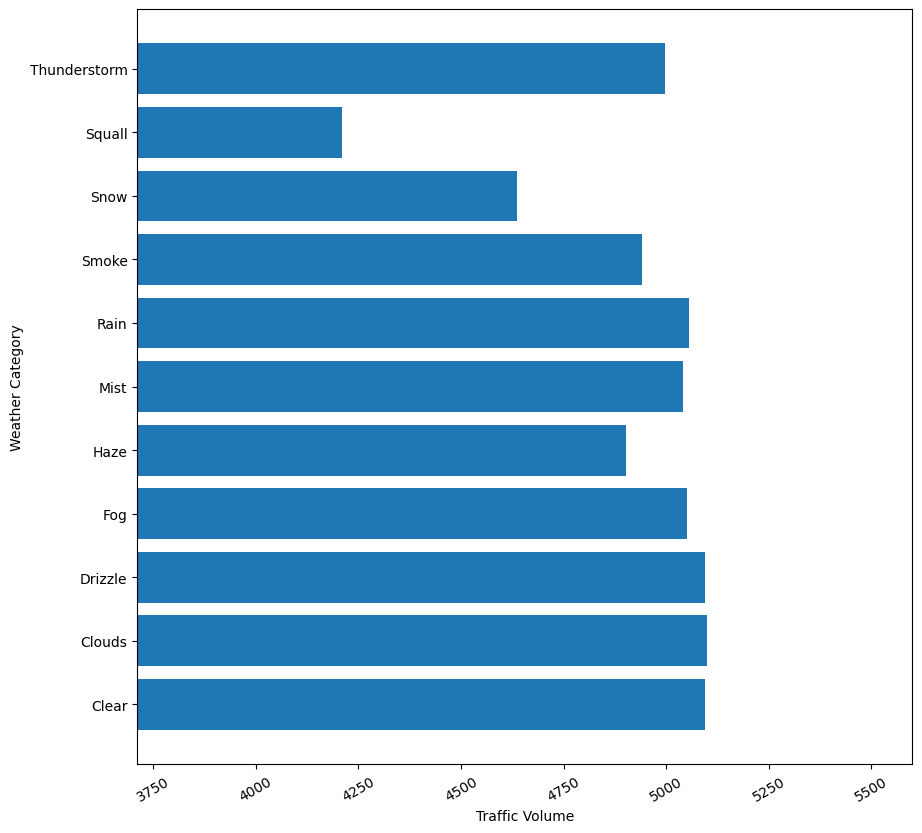

In [21]:
plt.figure(figsize=(10,10))
plt.barh(width=by_weather_main['traffic_volume'], y=by_weather_main.index)
plt.xticks(rotation=30)
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Category')
plt.xlim(by_weather_main['traffic_volume'].min()-500, by_weather_main['traffic_volume'].max()+500)
plt.show()

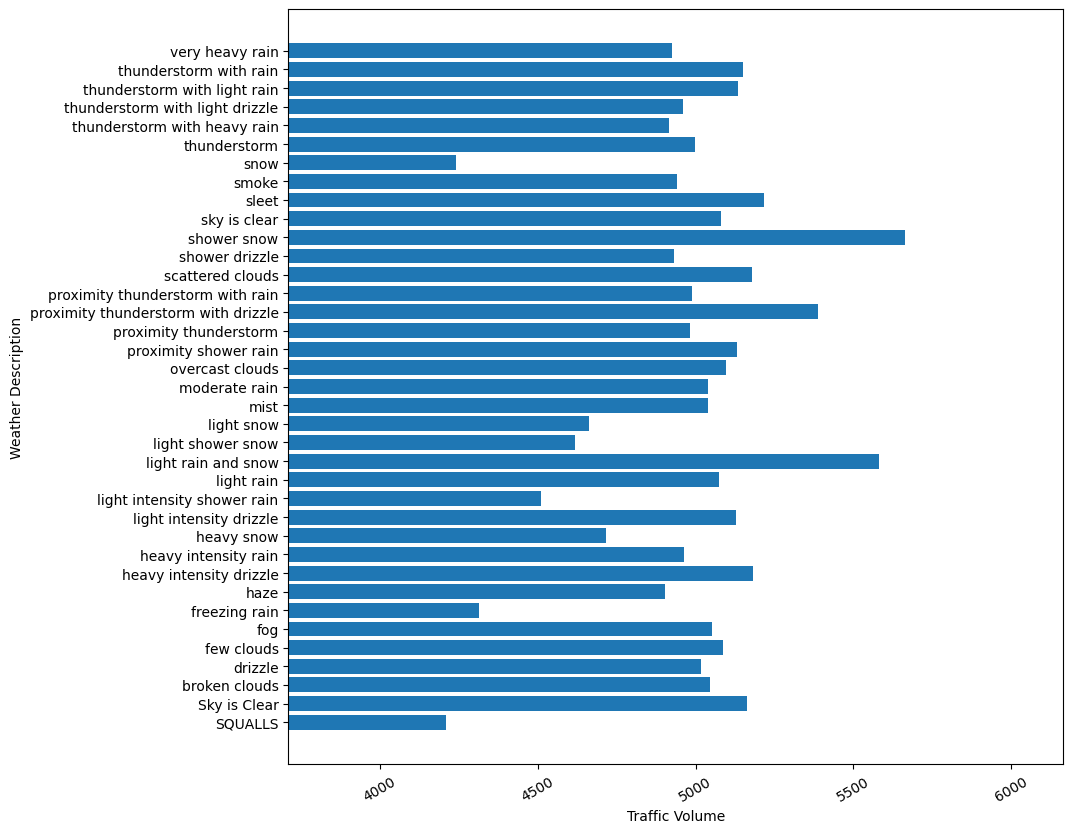

In [22]:
plt.figure(figsize=(10,10))
plt.barh(width=by_weather_description['traffic_volume'], y=by_weather_description.index)
plt.xticks(rotation=30)
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.xlim(by_weather_description['traffic_volume'].min()-500, by_weather_description['traffic_volume'].max()+500)
plt.show()

This by weather section is the most interesting to me. Traffic is heavier during rain, though not by much. Is this because the rain is causing a slow down? Conversely, the heavier the rain gets, the lower the traffic gets. I'm guessing that this is more due to people just avoiding getting on the road when the weather is too bad.

# Key Takeaways

Overall, the major indicators for higher traffic are as follows:

* Daylight hours
* Warmer months
* Business days of the week
* Commuting Hours
* Wet but not severe weather